In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import warnings
from itertools import product
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)


In [2]:
 final_hist = pd.read_csv(r"D:\IE 423\Project\ie423-2024-termproject-the-a-team\ie423-2024-termproject-the-a-team\DataSets\IncomeStats\Final_Historical_data_ISO.csv")


In [3]:
# Check column names
print("\nColumns in final_hist:")
print(final_hist.columns)


Columns in final_hist:
Index(['country', 'iso', 'GCAM_region_ID', 'year', 'REF', 'gini_reported',
       'gdp_ppp_pc_usd2011', 'population', 'Category', 'Income..net.',
       'gini_recalculated', 'Data source'],
      dtype='object')


In [4]:
# Display basic information about the dataset
print(final_hist.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85220 entries, 0 to 85219
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             85220 non-null  object 
 1   iso                 85220 non-null  object 
 2   GCAM_region_ID      85220 non-null  int64  
 3   year                85220 non-null  int64  
 4   REF                 85220 non-null  object 
 5   gini_reported       85220 non-null  object 
 6   gdp_ppp_pc_usd2011  85220 non-null  float64
 7   population          85220 non-null  float64
 8   Category            85220 non-null  object 
 9   Income..net.        85220 non-null  float64
 10  gini_recalculated   85220 non-null  object 
 11  Data source         85220 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 7.8+ MB
None


In [5]:
final_hist.head()

,country,iso,GCAM_region_ID,year,REF,gini_reported,gdp_ppp_pc_usd2011,population,Category,Income..net.,gini_recalculated,Data source
0,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d1,0.032262,0.290652233,Imputed from GINI coefficient
1,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d2,0.050450,0.290652233,Imputed from GINI coefficient
2,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d3,0.061768,0.290652233,Imputed from GINI coefficient
3,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d4,0.071800,0.290652233,Imputed from GINI coefficient
4,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d5,0.081803,0.290652233,Imputed from GINI coefficient


In [6]:
# Check for missing values
print(final_hist.isnull().sum())

country               0
iso                   0
GCAM_region_ID        0
year                  0
REF                   0
gini_reported         0
gdp_ppp_pc_usd2011    0
population            0
Category              0
Income..net.          0
gini_recalculated     0
Data source           0
dtype: int64


In [7]:
# Check for duplicate rows
duplicate_rows = final_hist[final_hist.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [8]:
#No missing values
# Check data types of each column
print(final_hist.dtypes)

country                object
iso                    object
GCAM_region_ID          int64
year                    int64
REF                    object
gini_reported          object
gdp_ppp_pc_usd2011    float64
population            float64
Category               object
Income..net.          float64
gini_recalculated      object
Data source            object
dtype: object


In [9]:
# Count unique values in each column
unique_counts = final_hist.nunique()
print(unique_counts)

country                 190
iso                     190
GCAM_region_ID           32
year                     51
REF                    8522
gini_reported          4379
gdp_ppp_pc_usd2011     5307
population             5511
Category                 10
Income..net.          44918
gini_recalculated      5306
Data source               3
dtype: int64


In [10]:
#country,iso,REF,gini_reported,Category,gini_recalculated,Data source are categorical: type= object
# List of columns to inspect
columns_to_inspect = ['Category', 'country', 'iso', 'REF', 'gini_reported', 'gini_recalculated', 'Data source']

# Iterate through columns and print unique values
for col in columns_to_inspect:
    unique_values = final_hist[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print("\n")


Unique values in column 'Category':
['d1' 'd2' 'd3' 'd4' 'd5' 'd6' 'd7' 'd8' 'd9' 'd10']


Unique values in column 'country':
['Afghanistan' 'Angola' 'Albania' 'United Arab Emirates' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin'
 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas'
 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bolivia' 'Brazil' 'Barbados'
 'Bhutan' 'Botswana' 'Central African Republic' 'Canada' 'Switzerland'
 'Chile' 'China' 'Cote dIvoire' 'Cameroon'
 'Congo, the Democratic Republic of the' 'Congo' 'Colombia' 'Comoros'
 'Cape Verde' 'Costa Rica' 'Czechoslovakia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Germany' 'Djibouti' 'Dominica' 'Denmark'
 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt' 'Spain' 'Estonia'
 'Ethiopia' 'Finland' 'Fiji' 'France' 'Micronesia, Federated States of'
 'Gabon' 'United Kingdom' 'Georgia' 'Ghana' 'Guinea' 'Gambia'
 'Guinea-Bissau' 'Equatorial Guinea' 'Greece' 'Grenada' 'Guatemala'
 'Guyana' 'Hong Kong' 

In [11]:
# Iterate through columns and print value counts
for col in columns_to_inspect:
    value_counts = final_hist[col].value_counts()
    print(f"Value counts for column '{col}':")
    print(value_counts)
    print("\n")


Value counts for column 'Category':
Category
d1     8522
d2     8522
d3     8522
d4     8522
d5     8522
d6     8522
d7     8522
d8     8522
d9     8522
d10    8522
Name: count, dtype: int64


Value counts for column 'country':
country
Afghanistan             490
Mauritania              490
Malawi                  490
Malaysia                490
Namibia                 490
                       ... 
Vanuatu                  10
Equatorial Guinea        10
Myanmar                  10
United Arab Emirates     10
Kiribati                 10
Name: count, Length: 190, dtype: int64


Value counts for column 'iso':
iso
afg    490
mrt    490
mwi    490
mys    490
nam    490
      ... 
vut     10
gnq     10
mmr     10
are     10
kir     10
Name: count, Length: 190, dtype: int64


Value counts for column 'REF':
REF
afg1967    10
nor1988    10
nor2002    10
nor2001    10
nor2000    10
           ..
gmb1997    10
gmb1996    10
gmb1995    10
gmb1994    10
zwe2015    10
Name: count, Length: 8522, dt

In [12]:
#  Identify outliers using summary statistics (for numerical columns)
final_hist.describe()

,GCAM_region_ID,year,gdp_ppp_pc_usd2011,population,Income..net.
count,85220.000000,85220.000000,85220.000000,8.522000e+04,85220.000000
mean,13.404952,1991.044121,12778.183079,3.094734e+07,0.100069
std,8.760130,14.154690,16161.450509,1.153225e+08,0.089606
min,1.000000,1958.000000,505.000000,1.052100e+04,0.000003
25%,5.000000,1979.000000,2896.000000,2.207725e+06,0.045701
50%,12.000000,1991.000000,7135.400000,6.669259e+06,0.075526
75%,21.000000,2003.000000,16543.200000,1.929479e+07,0.117796
max,32.000000,2015.000000,122637.000000,1.397029e+09,0.709478


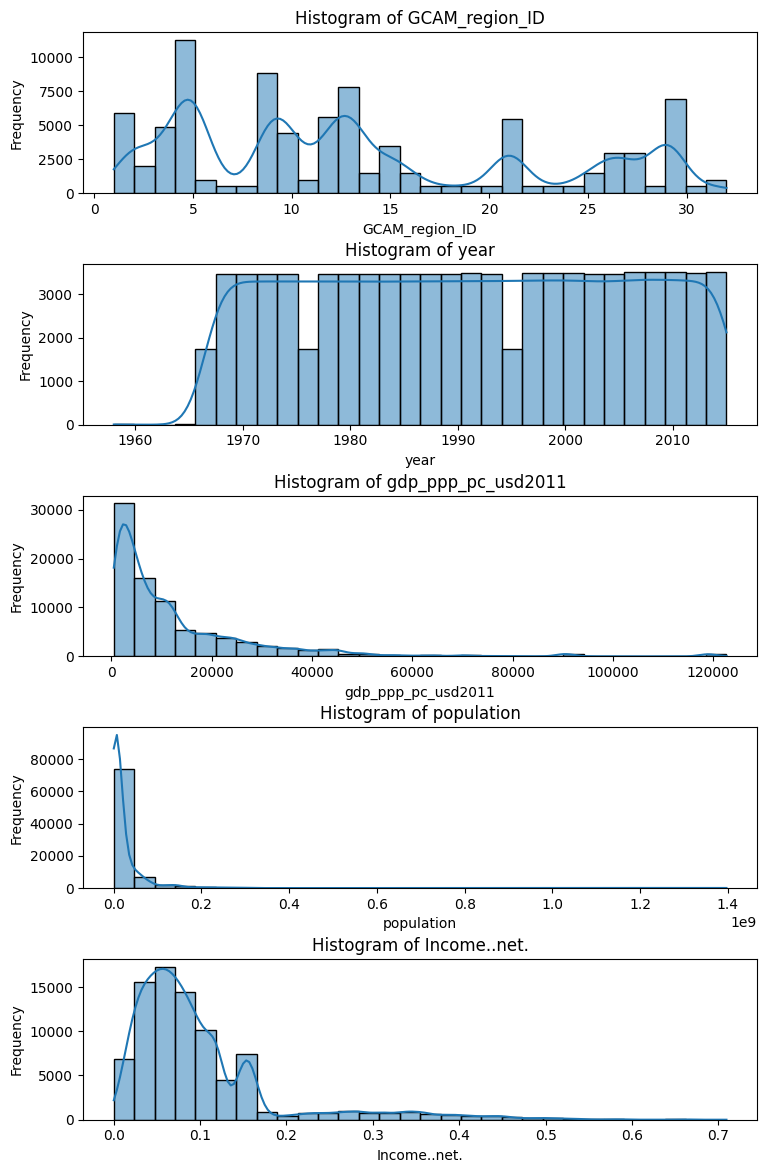

In [13]:
# Select numerical columns for histogram plotting
numerical_columns = ['GCAM_region_ID', 'year', 'gdp_ppp_pc_usd2011', 'population', 'Income..net.']

# Set up subplots for histograms
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 12))
fig.tight_layout(pad=3.0)  # Adjust spacing between subplots

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(final_hist[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.show()


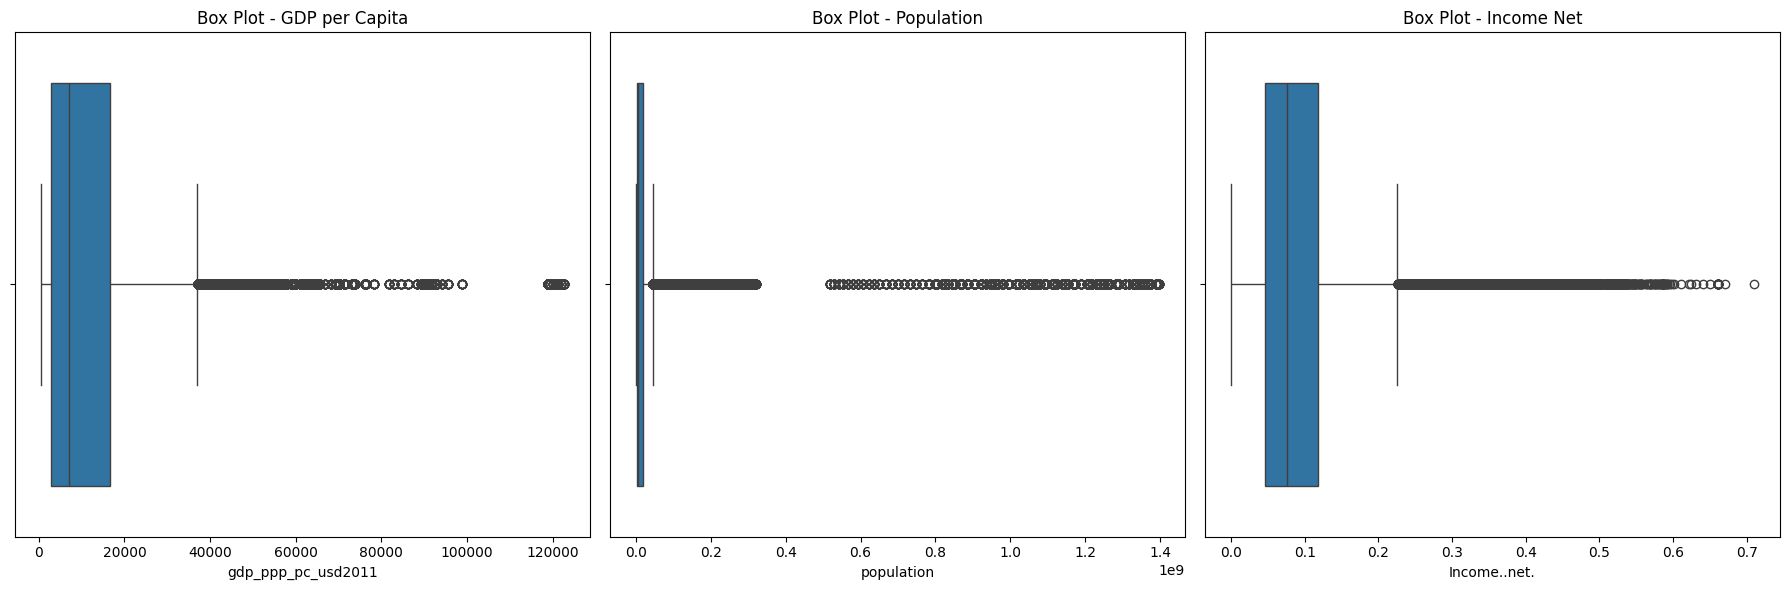

In [14]:
#GDP, population and Income net seem to have right skewness which mean majority of data clustered towards the lower end.
#The outliers in data can significantly influence the skewness towards the right.
#GDP per Capita and Population likely follow skewed distributions given the large difference between the mean and median values, along with the wide range from min to max.
#Income net seems to have a smaller range and lower variability compared to GDP and Population.

# Box plots 
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Changed from 1, 2 to 1, 3 for three plots

# Box plot for 'gdp_ppp_pc_usd2011'
sns.boxplot(x=final_hist['gdp_ppp_pc_usd2011'], ax=axs[0])
axs[0].set_title('Box Plot - GDP per Capita')

# Box plot for 'population'
sns.boxplot(x=final_hist['population'], ax=axs[1])
axs[1].set_title('Box Plot - Population')

# Box plot for 'Income..net.'
sns.boxplot(x=final_hist['Income..net.'], ax=axs[2])  # Changed from axs[1] to axs[2]
axs[2].set_title('Box Plot - Income Net')  # Changed from axs[1] to axs[2]

# Adjust layout
plt.tight_layout()
plt.show()

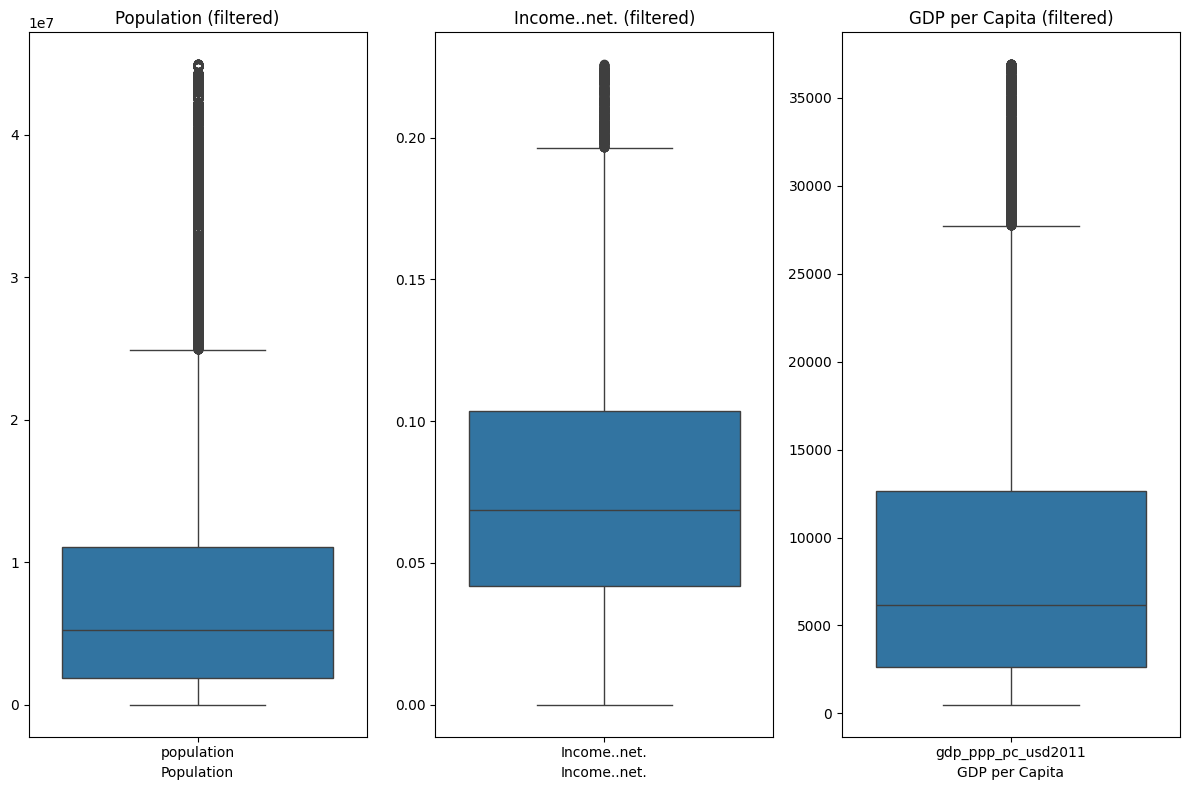

In [15]:
# Calculate quartiles and IQR for 'population', 'Income..net.', and 'gdp_ppp_pc_usd2011' columns
Q1_pop = final_hist['population'].quantile(0.25)
Q3_pop = final_hist['population'].quantile(0.75)
IQR_pop = Q3_pop - Q1_pop

Q1_income = final_hist['Income..net.'].quantile(0.25)
Q3_income = final_hist['Income..net.'].quantile(0.75)
IQR_income = Q3_income - Q1_income

Q1_gdp = final_hist['gdp_ppp_pc_usd2011'].quantile(0.25)
Q3_gdp = final_hist['gdp_ppp_pc_usd2011'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Define bounds for 'population', 'Income..net.', and 'gdp_ppp_pc_usd2011' columns
lower_bound_pop = Q1_pop - 1.5 * IQR_pop
upper_bound_pop = Q3_pop + 1.5 * IQR_pop

lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

# Filtering out the outliers for 'population', 'Income..net.', and 'gdp_ppp_pc_usd2011' columns
filtered_df = final_hist[(final_hist['population'] >= lower_bound_pop) & (final_hist['population'] <= upper_bound_pop) &
                         (final_hist['Income..net.'] >= lower_bound_income) & (final_hist['Income..net.'] <= upper_bound_income) &
                         (final_hist['gdp_ppp_pc_usd2011'] >= lower_bound_gdp) & (final_hist['gdp_ppp_pc_usd2011'] <= upper_bound_gdp)]

# Show new boxplots for filtered data
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
sns.boxplot(data=filtered_df[['population']])
plt.title('Population (filtered)')
plt.xlabel('Population')

plt.subplot(1, 3, 2)
sns.boxplot(data=filtered_df[['Income..net.']])
plt.title('Income..net. (filtered)')
plt.xlabel('Income..net.')

plt.subplot(1, 3, 3)
sns.boxplot(data=filtered_df[['gdp_ppp_pc_usd2011']])
plt.title('GDP per Capita (filtered)')
plt.xlabel('GDP per Capita')

plt.tight_layout()
plt.show()


In [16]:
filtered_df.head()

,country,iso,GCAM_region_ID,year,REF,gini_reported,gdp_ppp_pc_usd2011,population,Category,Income..net.,gini_recalculated,Data source
0,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d1,0.032262,0.290652233,Imputed from GINI coefficient
1,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d2,0.050450,0.290652233,Imputed from GINI coefficient
2,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d3,0.061768,0.290652233,Imputed from GINI coefficient
3,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d4,0.071800,0.290652233,Imputed from GINI coefficient
4,Afghanistan,afg,27,1967,afg1967,0.29,1268.0,27722282.0,d5,0.081803,0.290652233,Imputed from GINI coefficient


In [17]:
filtered_df.describe()

,GCAM_region_ID,year,gdp_ppp_pc_usd2011,population,Income..net.
count,62481.000000,62481.000000,62481.000000,6.248100e+04,62481.000000
mean,12.758887,1990.051376,9179.669101,8.692539e+06,0.075839
std,8.857409,14.055027,8436.819272,9.678535e+06,0.043777
min,1.000000,1958.000000,505.000000,1.052100e+04,0.000003
25%,5.000000,1978.000000,2626.857000,1.870978e+06,0.041815
50%,10.000000,1990.000000,6137.000000,5.219959e+06,0.068772
75%,21.000000,2002.000000,12673.000000,1.108055e+07,0.103704
max,32.000000,2015.000000,36899.000000,4.492164e+07,0.225873


In [18]:
#there still seems to be outliers after filtering data so transformation and scaling will be needed 
print(filtered_df.dtypes)

country                object
iso                    object
GCAM_region_ID          int64
year                    int64
REF                    object
gini_reported          object
gdp_ppp_pc_usd2011    float64
population            float64
Category               object
Income..net.          float64
gini_recalculated      object
Data source            object
dtype: object


In [19]:
# Define categorical columns for encoding
categorical_cols = ['country', 'iso', 'REF', 'Category', 'gini_reported', 'gini_recalculated', 'Data source']

# Apply one-hot encoding using pandas get_dummies
final_df = pd.get_dummies(filtered_df, columns=categorical_cols, drop_first=True)

# Check the updated DataFrame with one-hot encoded columns
print(final_df.head())


   GCAM_region_ID  year  gdp_ppp_pc_usd2011  population  Income..net.  \
0              27  1967              1268.0  27722282.0      0.032262   
1              27  1967              1268.0  27722282.0      0.050450   
2              27  1967              1268.0  27722282.0      0.061768   
3              27  1967              1268.0  27722282.0      0.071800   
4              27  1967              1268.0  27722282.0      0.081803   

   country_Albania  country_Algeria  country_Angola  country_Argentina  \
0            False            False           False              False   
1            False            False           False              False   
2            False            False           False              False   
3            False            False           False              False   
4            False            False           False              False   

   country_Armenia  ...  gini_recalculated_0.6825384  \
0            False  ...                        False   
1   

In [20]:
final_df.head()

,GCAM_region_ID,year,gdp_ppp_pc_usd2011,population,Income..net.,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,...,gini_recalculated_0.6825384,gini_recalculated_0.6838873,gini_recalculated_0.6893332,gini_recalculated_0.6935991,gini_recalculated_0.6962398,gini_recalculated_0.6981975,gini_recalculated_0.7070619,gini_recalculated_0.7445728,Data source_Imputed from original data on consumption,Data source_Original data on net income
0,27,1967,1268.0,27722282.0,0.032262,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,27,1967,1268.0,27722282.0,0.050450,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,27,1967,1268.0,27722282.0,0.061768,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,27,1967,1268.0,27722282.0,0.071800,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,27,1967,1268.0,27722282.0,0.081803,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


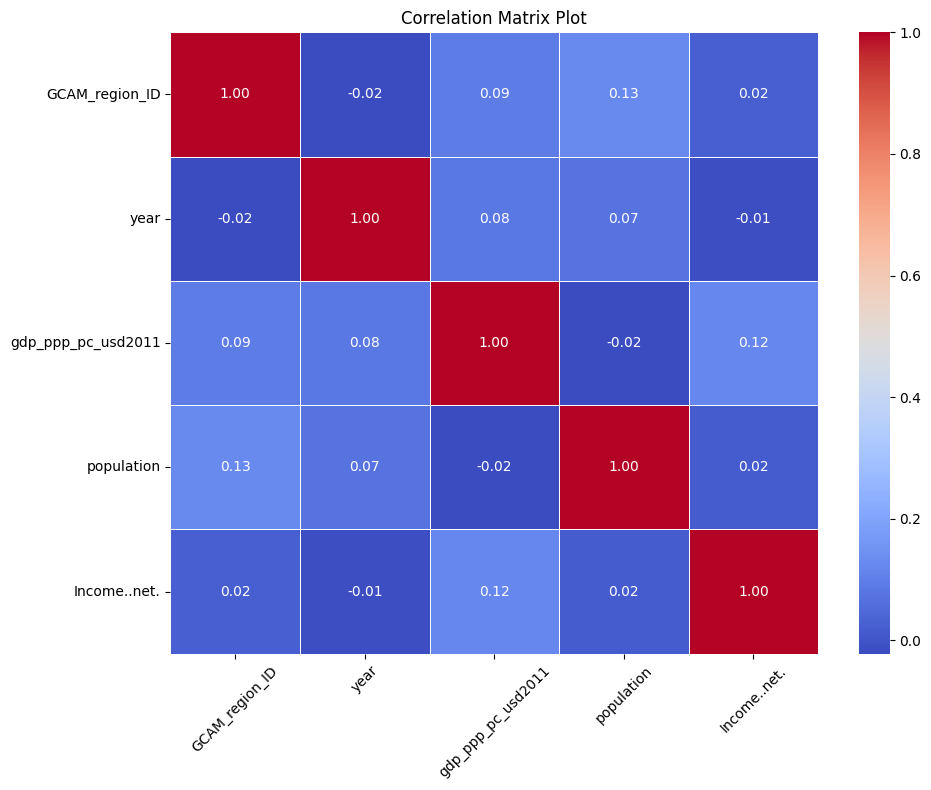

In [21]:
numerical_cols = final_df[['GCAM_region_ID', 'year', 'gdp_ppp_pc_usd2011', 'population', 'Income..net.']]

# Compute the correlation matrix
corr_matrix = numerical_cols.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Plot')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [22]:
# The uploaded image is a Correlation Matrix Plot representing correlation coefficients between variables.
# Blue shades signify positive correlations, with darker shades indicating stronger positive correlations.
# Red shades indicate negative correlations, with darker shades representing stronger negative correlations.
# The variables included are 'GCAM_region_ID', 'year', 'gdp_ppp_pc_usd2011', 'population', and 'income_net'.
# The diagonal elements (strongest blue) represent each variable's correlation with itself, which is always 1.
# Non-diagonal elements show pairwise correlations between variables:
  #'GCAM_region_ID' has a low positive correlation with 'population' (0.13) and negligible correlation with other variables.
  # 'year' doesn't show a strong correlation with any variables.
  #'gdp_ppp_pc_usd2011' has a small positive correlation with 'income_net' (0.12).
  # 'population' does not show strong correlations with any variables.
  # 'income_net' also does not correlate strongly with other variables.
# Correlation coefficients range from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.
# The matrix suggests there are no strong correlations between the variables, as most values are close to zero.